In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 2.Using the Scikit-Learn’s fetch_california_housing()function to download the California Housing Problem data

In [ ]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)

In [ ]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
california_housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

# 3.Using the sequential API build a regression MLP(to make predications. Model can have 1 hidden layer with 30 units. Visualize the MSE for 20 epochs.Comment on overallaccuracy.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(california_housing.data, california_housing.target)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)])

In [ ]:
model.compile(loss = 'mean_squared_error', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['mse'])

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 4.2219 - mse: 4.2219 - val_loss: 3.6454 - val_mse: 3.6454
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 2.8740 - mse: 2.8740 - val_loss: 2.4932 - val_mse: 2.4932
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 1.9749 - mse: 1.9749 - val_loss: 1.7400 - val_mse: 1.7400
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 1.4068 - mse: 1.4068 - val_loss: 1.2795 - val_mse: 1.2795
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 1.0710 - mse: 1.0710 - val_loss: 1.0192 - val_mse: 1.0192
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8863 - mse: 0.8863 - val_loss: 0.8775 - val_mse: 0.8775
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7842 - mse: 0.7842 - val_loss: 0.7987 - val_mse: 0.7987
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.

In [ ]:
 model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 715us/step - loss: 0.4594 - mse: 0.4594


[0.45940735936164856, 0.45940735936164856]

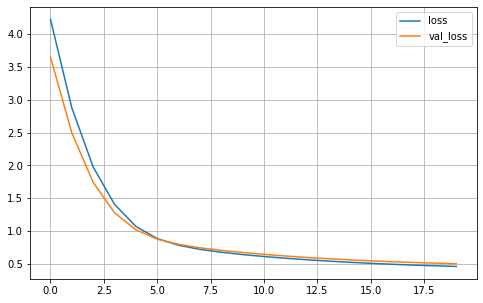

In [ ]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(8,5))
plt.grid(True)
plt.show()



##4.Using functional API build the following Wide & Deep Neural Networkwith the following architecture.

## Let Hidden layers contain 30 units each withReLU activation. Pass features 0 to 4 in the wide path  and  features  2  to 7  into  the deep  path.Visualize  the MSE  for  20  epochs.Comment  on overallaccuracy.

In [ ]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden_LAYER1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden_LAYER2 = keras.layers.Dense(30, activation="relu")(hidden_LAYER1)
concat = keras.layers.concatenate([input_A, hidden_LAYER2])
output = keras.layers.Dense(1)(concat)
model1 = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [ ]:
model1.compile(loss="mse", optimizer="adam")

In [ ]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history1 = model1.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model1.evaluate((X_test_A, X_test_B), y_test)
y_pred = model1.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3926 - val_loss: 0.6870
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5148 - val_loss: 0.4921
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4283 - val_loss: 0.4490
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4014 - val_loss: 0.4243
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3946 - val_loss: 0.4143
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3838 - val_loss: 0.4028
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3678 - val_loss: 0.3912
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3590 - val_loss: 0.3827
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3556 - val_loss: 0.3766
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3595 - val_loss: 0.3767

In [ ]:
model1.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3385


0.3385390639305115

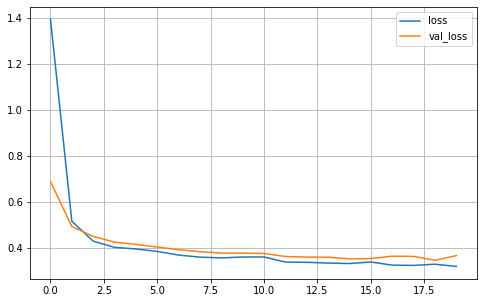

In [ ]:
pd.DataFrame(history1.history)[['loss', 'val_loss']].plot(figsize=(8,5))
plt.grid(True)
plt.show()